In [52]:
#---------Authors---------
#t.acosta
#da.rubioh
#d.alvarezp
#---------------------

# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

from scipy import stats
##Import pipeline
from joblib import dump, load

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [53]:
datos2017 = pd.read_csv("Datos_proyecto_II_BI_2017.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_4340\2745159705.py:1: DtypeWarning: Columns (145,295,297,380,381,383,469,495,496,499,500,501,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  datos2017 = pd.read_csv("Datos_proyecto_II_BI_2017.csv")


In [54]:
datos2021 = pd.read_csv("Datos_proyecto_II_BI_2021.csv", encoding="latin1")

C:\Users\user\AppData\Local\Temp\ipykernel_4340\1262933228.py:1: DtypeWarning: Columns (334,410,412,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify dtype option on import or set low_memory=False.
  datos2021 = pd.read_csv("Datos_proyecto_II_BI_2021.csv", encoding="latin1")


In [55]:
datos2021

,Unnamed: 0,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,...,NPCHP35C,NPCHP35D,NPCHP35E,NPCHP35F,NPCHP35I,NPCHP35J,NPCHP35K,NPCHP36,NPCHP36A,NPCHP37
0,1,1000001,10000011,100000111,11,11001,1,7.0,Bosa,87.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
1,2,1000004,10000041,100000412,11,11001,1,7.0,Bosa,87.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,3,1000033,10000331,100003313,11,11001,1,5.0,Usme,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,4,1000040,10000401,100004011,11,11001,1,9.0,Fontibon,77.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
4,5,1000041,10000411,100004111,11,11001,1,9.0,Fontibon,77.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,8626,999973,9999731,99997311,11,11001,1,7.0,Bosa,87.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
8626,8627,999974,9999741,99997413,11,11001,1,7.0,Bosa,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
8627,8628,999977,9999771,99997713,11,11001,1,7.0,Bosa,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8628,8629,999983,9999831,99998313,11,11001,1,7.0,Bosa,85.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN


In [56]:
datos2017

,Unnamed: 0,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,SECUENCIA,SECUENCIA_P,ORDEN,NVCAP99,DPTOMPIO,CLASE,...,NPCHP34,NPCHP34A,NPCHP35A,NPCHP35B,NPCHP35C,NPCHP35D,NPCHP35E,NPCHP35F,NPCHP35J,NPCHP35I
0,1,101033,1010331,10103311,1,1,1,06SEP2017:00:00:00,11001,1,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,2,101041,1010411,10104112,1,1,1,06SEP2017:00:00:00,11001,1,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,101042,1010421,10104213,1,1,1,08SEP2017:00:00:00,11001,1,...,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4,101047,1010471,10104713,1,1,1,11SEP2017:00:00:00,11001,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,101059,1010591,10105914,1,1,1,09SEP2017:00:00:00,11001,1,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,4723,317616,3176161,31761611,1,1,1,26FEB2018:00:00:00,11001,3,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4723,4724,317825,3178251,31782512,1,1,1,16FEB2018:00:00:00,11001,3,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4724,4725,317825,3178251,31782513,1,1,1,16FEB2018:00:00:00,11001,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4725,4726,317825,3178251,31782514,1,1,1,16FEB2018:00:00:00,11001,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
datos2017.dtypes

Unnamed: 0          int64
DIRECTORIO          int64
DIRECTORIO_HOG      int64
DIRECTORIO_PER      int64
SECUENCIA           int64
                   ...   
NPCHP35D          float64
NPCHP35E          float64
NPCHP35F          float64
NPCHP35J          float64
NPCHP35I          float64
Length: 552, dtype: object

In [58]:
columnas2021 = ["DIRECTORIO","DIRECTORIO_HOG", "DIRECTORIO_PER" ,"NVCBP8A","NVCBP8G","NVCBP12","NVCBP13","NVCBP14A",
                "NVCBP14B", "NVCBP14D","NVCBP14I","NVCBP15D","NVCBP15F",
                "NPCFP14F","MPIO","NPCEP5","NPCEP4","NVCBP12","NVCBP13"]

columnas2017 = ["DIRECTORIO","DIRECTORIO_HOG", "DIRECTORIO_PER" ,"NVCBP8A","NVCBP8G","NVCBP12","NVCBP13","NVCBP14A",
                "NVCBP14B", "NVCBP14D","NVCBP14I","NVCBP15D","NVCBP15F",
                "NPCFP14I","DPTOMPIO","NPCEP5","NPCEP4","NVCBP12","NVCBP13"]

In [59]:
dfVar2021 = datos2021[columnas2021]

In [60]:
dfVar2021.shape

(8630, 19)

In [61]:
dfVar2021.describe()

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NVCBP8A,NVCBP8G,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14D,NVCBP14I,NVCBP15D,NVCBP15F,NPCFP14F,MPIO,NPCEP5,NPCEP4,NVCBP12,NVCBP13
count,8.630000e+03,8.630000e+03,8.630000e+03,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.0,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,1.062837e+06,1.062837e+07,1.066168e+08,1.717729,2.027578,1.082619,4.070568,1.822480,1.881576,1.909386,1.865122,1.702897,1.791657,1.0,13329.605330,1.575435,46.481692,1.082619,4.070568
std,5.848858e+05,5.848858e+06,6.117052e+07,0.743683,0.771151,0.588460,0.794145,0.382131,0.323128,0.287076,0.341613,0.457009,0.406147,0.0,5311.175505,0.494306,26.434386,0.588460,0.794145
min,2.201020e+05,2.201021e+06,2.201021e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,11001.000000,1.000000,0.000000,1.000000,1.000000
25%,9.878092e+05,9.878094e+06,9.878094e+07,1.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.0,11001.000000,1.000000,22.000000,1.000000,4.000000
50%,1.042325e+06,1.042325e+07,1.042364e+08,2.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,11001.000000,2.000000,47.000000,1.000000,4.000000
75%,1.145552e+06,1.145553e+07,1.145560e+08,2.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,11001.000000,2.000000,70.000000,1.000000,4.000000
max,3.006798e+06,3.006798e+07,1.165204e+09,9.000000,9.000000,8.000000,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,25899.000000,2.000000,105.000000,8.000000,7.000000


In [62]:
dfVar2021.isnull().mean() * 100

DIRECTORIO        0.0
DIRECTORIO_HOG    0.0
DIRECTORIO_PER    0.0
NVCBP8A           0.0
NVCBP8G           0.0
NVCBP12           0.0
NVCBP13           0.0
NVCBP14A          0.0
NVCBP14B          0.0
NVCBP14D          0.0
NVCBP14I          0.0
NVCBP15D          0.0
NVCBP15F          0.0
NPCFP14F          0.0
MPIO              0.0
NPCEP5            0.0
NPCEP4            0.0
NVCBP12           0.0
NVCBP13           0.0
dtype: float64

In [63]:
dfVar2017=datos2017[columnas2017]

In [64]:
dfVar2017.shape

(4727, 19)

In [65]:
dfVar2017.dtypes

DIRECTORIO        int64
DIRECTORIO_HOG    int64
DIRECTORIO_PER    int64
NVCBP8A           int64
NVCBP8G           int64
NVCBP12           int64
NVCBP13           int64
NVCBP14A          int64
NVCBP14B          int64
NVCBP14D          int64
NVCBP14I          int64
NVCBP15D          int64
NVCBP15F          int64
NPCFP14I          int64
DPTOMPIO          int64
NPCEP5            int64
NPCEP4            int64
NVCBP12           int64
NVCBP13           int64
dtype: object

In [66]:
dfVar2017.isna().mean() * 100

DIRECTORIO        0.0
DIRECTORIO_HOG    0.0
DIRECTORIO_PER    0.0
NVCBP8A           0.0
NVCBP8G           0.0
NVCBP12           0.0
NVCBP13           0.0
NVCBP14A          0.0
NVCBP14B          0.0
NVCBP14D          0.0
NVCBP14I          0.0
NVCBP15D          0.0
NVCBP15F          0.0
NPCFP14I          0.0
DPTOMPIO          0.0
NPCEP5            0.0
NPCEP4            0.0
NVCBP12           0.0
NVCBP13           0.0
dtype: float64

In [67]:
print(len(dfVar2021["MPIO"].unique().tolist()))

22


In [68]:
print(len(dfVar2017["DPTOMPIO"].unique().tolist()))
dfVar2017["DPTOMPIO"].unique()

38


array([11001, 25295, 25758, 25200, 25307, 25320, 25175, 25875, 25899,
       25754, 25799, 25151, 25513, 25843, 25099, 25769, 25473, 25126,
       25269, 25286, 25386, 25183, 25740, 25785, 25438, 25781, 25662,
       25736, 25793, 25817, 25290, 25326, 25214, 25297, 25486, 25260,
       25430, 25377], dtype=int64)

In [69]:
dfVar2021.loc[dfVar2021["MPIO"] == 11001, "MPIO"] = "Bogotá"
dfVar2021.loc[dfVar2021["MPIO"] == 25099, "MPIO"] = "Bojacá"
dfVar2021.loc[dfVar2021["MPIO"] == 25126, "MPIO"] = "Medellín"
dfVar2021.loc[dfVar2021["MPIO"] == 25175, "MPIO"] = "Chía"
dfVar2021.loc[dfVar2021["MPIO"] == 25214, "MPIO"] = "Cota"

dfVar2021.loc[dfVar2021["MPIO"] == 25785, "MPIO"] = "Tabio"
dfVar2021.loc[dfVar2021["MPIO"] == 25260, "MPIO"] = "El Rosal"
dfVar2021.loc[dfVar2021["MPIO"] == 25286, "MPIO"] = "Funza"
dfVar2021.loc[dfVar2021["MPIO"] == 25269, "MPIO"] = "Facatativa"
dfVar2021.loc[dfVar2021["MPIO"] == 25377, "MPIO"] = "La Calera"

dfVar2021.loc[dfVar2021["MPIO"] == 25473, "MPIO"] = "Mosquera"
dfVar2021.loc[dfVar2021["MPIO"] == 25799, "MPIO"] = "Tenjo"
dfVar2021.loc[dfVar2021["MPIO"] == 25754, "MPIO"] = "Soacha"
dfVar2021.loc[dfVar2021["MPIO"] == 25769, "MPIO"] = "Subachoque"
dfVar2021.loc[dfVar2021["MPIO"] == 25740, "MPIO"] = "Sibaté"

dfVar2021.loc[dfVar2021["MPIO"] == 25899, "MPIO"] = "Zipaquirá"
dfVar2021.loc[dfVar2021["MPIO"] == 25290, "MPIO"] = "Fusagasugá"
dfVar2021.loc[dfVar2021["MPIO"] == 25430, "MPIO"] = "Madrid"
dfVar2021.loc[dfVar2021["MPIO"] == 25758, "MPIO"] = "Sopo"
dfVar2021.loc[dfVar2021["MPIO"] == 25817, "MPIO"] = "Tocancipá"
dfVar2021.loc[dfVar2021["MPIO"] == 25898, "MPIO"] = "Zipacón"
dfVar2021.loc[dfVar2021["MPIO"] == 25295, "MPIO"] = "Gachancipá"

In [70]:
dfVar2017["DPTOMPIO"].unique()

array([11001, 25295, 25758, 25200, 25307, 25320, 25175, 25875, 25899,
       25754, 25799, 25151, 25513, 25843, 25099, 25769, 25473, 25126,
       25269, 25286, 25386, 25183, 25740, 25785, 25438, 25781, 25662,
       25736, 25793, 25817, 25290, 25326, 25214, 25297, 25486, 25260,
       25430, 25377], dtype=int64)

In [71]:
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 11001, "DPTOMPIO"] = "Bogotá"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25295, "DPTOMPIO"] = "Gachancipá"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25758, "DPTOMPIO"] = "Sopo"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25899, "DPTOMPIO"] = "Zipaquirá"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25754, "DPTOMPIO"] = "Soacha"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25799, "DPTOMPIO"] = "Tenjo"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25099, "DPTOMPIO"] = "Bojacá"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25769, "DPTOMPIO"] = "Subachoque"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25473, "DPTOMPIO"] = "Mosquera"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25126, "DPTOMPIO"] = "Medellín"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25269, "DPTOMPIO"] = "Facatativa"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25200, "DPTOMPIO"] = "Funza"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25740, "DPTOMPIO"] = "Sibaté"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25785, "DPTOMPIO"] = "Tabio"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25817, "DPTOMPIO"] = "Tocancipá"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25290, "DPTOMPIO"] = "Fusagasugá"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25214, "DPTOMPIO"] = "Cota"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25260, "DPTOMPIO"] = "El Rosal"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25430, "DPTOMPIO"] = "Madrid"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25377, "DPTOMPIO"] = "La Calera"

dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25307, "DPTOMPIO"] = "Girardot"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25320, "DPTOMPIO"] = "Guaduas"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25175, "DPTOMPIO"] = "Chía"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25875, "DPTOMPIO"] = "Villeta"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25151, "DPTOMPIO"] = "Caqueza"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25513, "DPTOMPIO"] = "Pacho"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25843, "DPTOMPIO"] = "Villa de san diego de ubate"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25286, "DPTOMPIO"] = "Funza"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25386, "DPTOMPIO"] = "La mesa"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25183, "DPTOMPIO"] = "Choconta"

dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25438, "DPTOMPIO"] = "Medina"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25781, "DPTOMPIO"] = "Sutatausa"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25662, "DPTOMPIO"] = "San Juan de rio seco"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25736, "DPTOMPIO"] = "Sesquile"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25793, "DPTOMPIO"] = "Tausa"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25183, "DPTOMPIO"] = "Choconta"
25326
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25326, "DPTOMPIO"] = "Guatavita"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25297, "DPTOMPIO"] = "Gacheta"
dfVar2017.loc[dfVar2017["DPTOMPIO"] == 25486, "DPTOMPIO"] = "Nemocon"

In [72]:
dfVar2021

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NVCBP8A,NVCBP8G,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14D,NVCBP14I,NVCBP15D,NVCBP15F,NPCFP14F,MPIO,NPCEP5,NPCEP4,NVCBP12,NVCBP13
0,1000001,10000011,100000111,2,2,1,4,2,2,2,2,2,2,1,Bogotá,2,70,1,4
1,1000004,10000041,100000412,1,2,1,4,2,2,2,2,2,2,1,Bogotá,2,60,1,4
2,1000033,10000331,100003313,2,2,1,4,1,2,2,1,1,2,1,Bogotá,1,13,1,4
3,1000040,10000401,100004011,2,2,1,4,1,2,2,2,2,2,1,Bogotá,1,38,1,4
4,1000041,10000411,100004111,1,2,1,4,1,2,2,2,1,2,1,Bogotá,2,56,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,999973,9999731,99997311,1,1,1,6,1,1,1,2,1,1,1,Bogotá,2,35,1,6
8626,999974,9999741,99997413,1,2,1,4,2,1,2,2,1,1,1,Bogotá,1,9,1,4
8627,999977,9999771,99997713,1,2,1,4,1,1,2,2,1,1,1,Bogotá,1,0,1,4
8628,999983,9999831,99998313,1,2,1,4,2,2,2,2,2,2,1,Bogotá,1,37,1,4


In [73]:
dfVar2017["NPCEP4"].describe()

count    4727.000000
mean       35.400677
std        24.110371
min         0.000000
25%        15.000000
50%        30.000000
75%        55.000000
max       100.000000
Name: NPCEP4, dtype: float64

In [74]:
dfVar2021["NPCEP4"].describe()

count    8630.000000
mean       46.481692
std        26.434386
min         0.000000
25%        22.000000
50%        47.000000
75%        70.000000
max       105.000000
Name: NPCEP4, dtype: float64

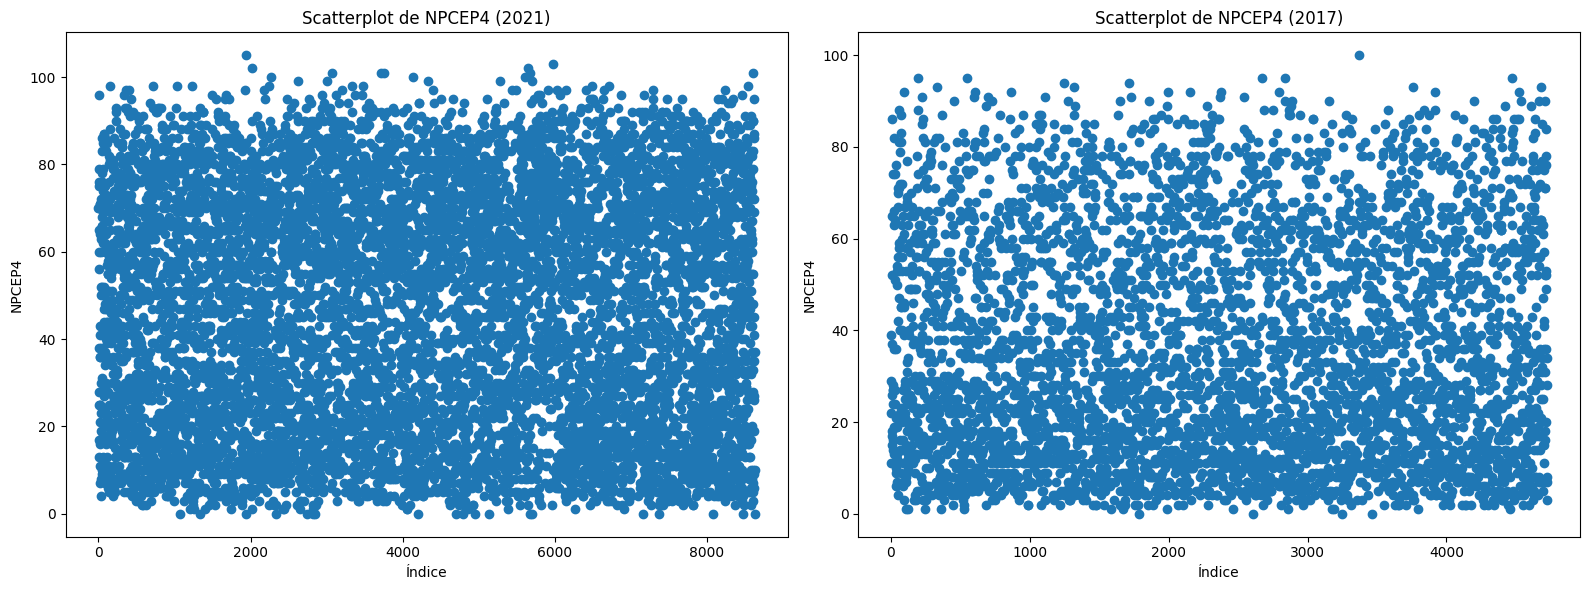

In [75]:
# Crear la figura con dos subtramas para los gráficos de dispersión
plt.figure(figsize=(16, 6))

# Subtrama 1 - Gráfico de dispersión para NPCEP4 en dfVar2021
plt.subplot(1, 2, 1)
plt.scatter(dfVar2021.index, dfVar2021["NPCEP4"])
plt.title('Scatterplot de NPCEP4 (2021)')
plt.xlabel('Índice')
plt.ylabel('NPCEP4')

# Subtrama 2 - Gráfico de dispersión para NPCEP4 en dfVar2017
plt.subplot(1, 2, 2)
plt.scatter(dfVar2017.index, dfVar2017["NPCEP4"])
plt.title('Scatterplot de NPCEP4 (2017)')
plt.xlabel('Índice')
plt.ylabel('NPCEP4')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

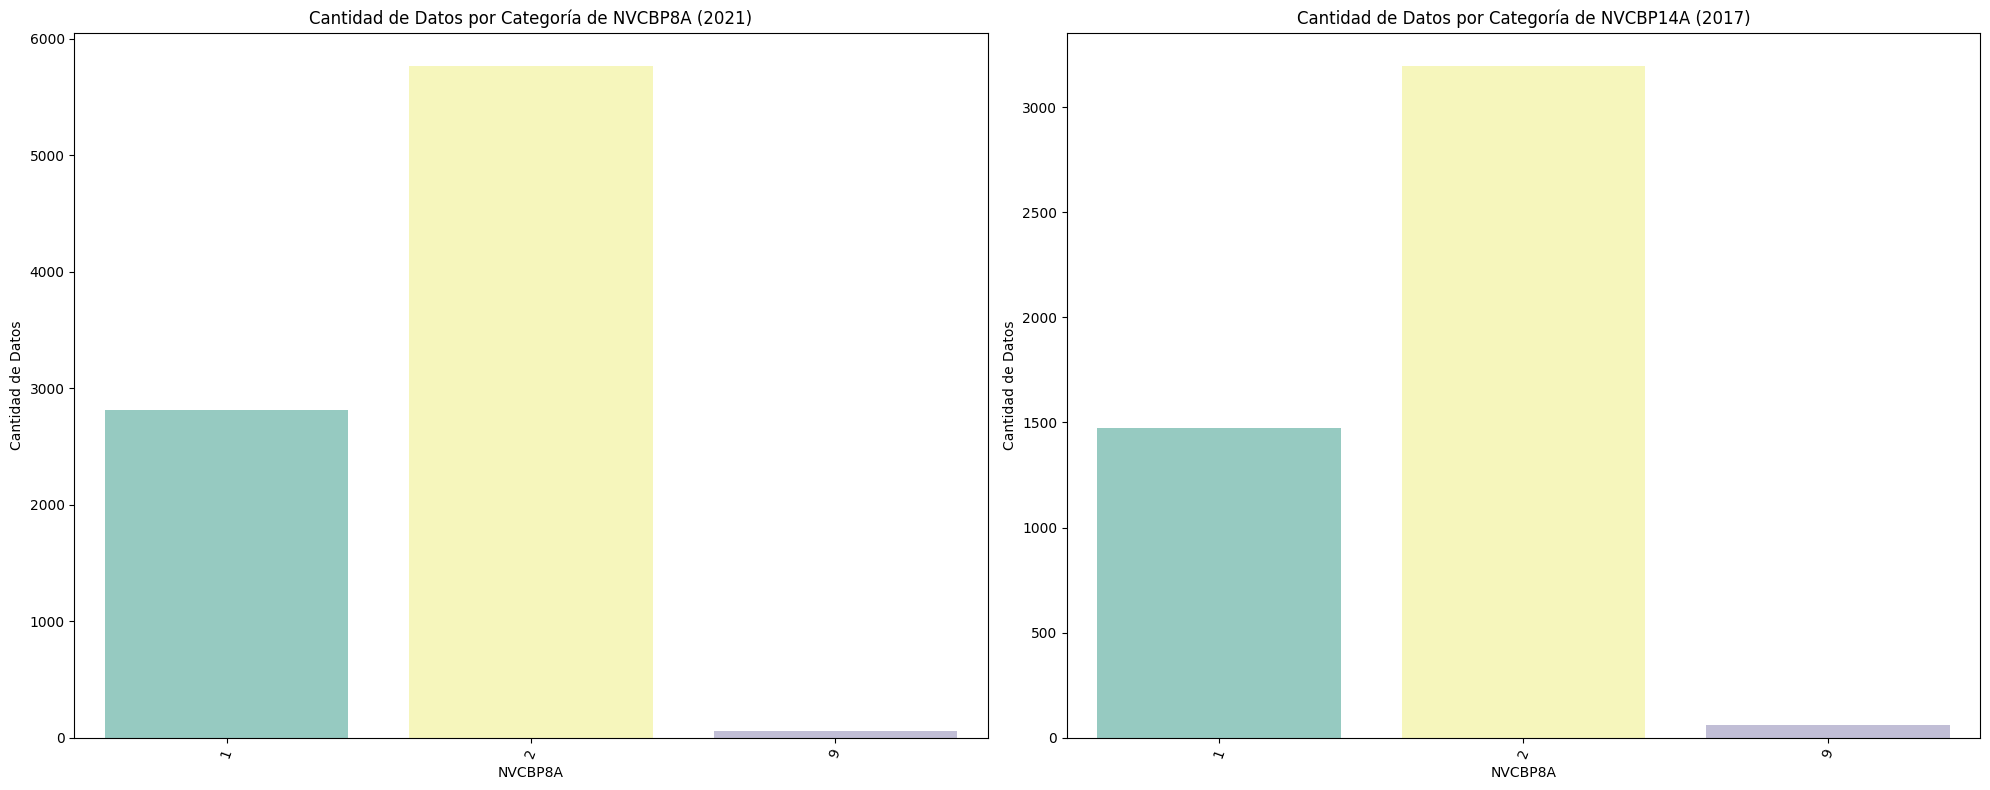

In [76]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NVCBP8A", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP8A (2021)')
plt.xlabel('NVCBP8A')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NVCBP8A", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP14A (2017)')
plt.xlabel('NVCBP8A')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

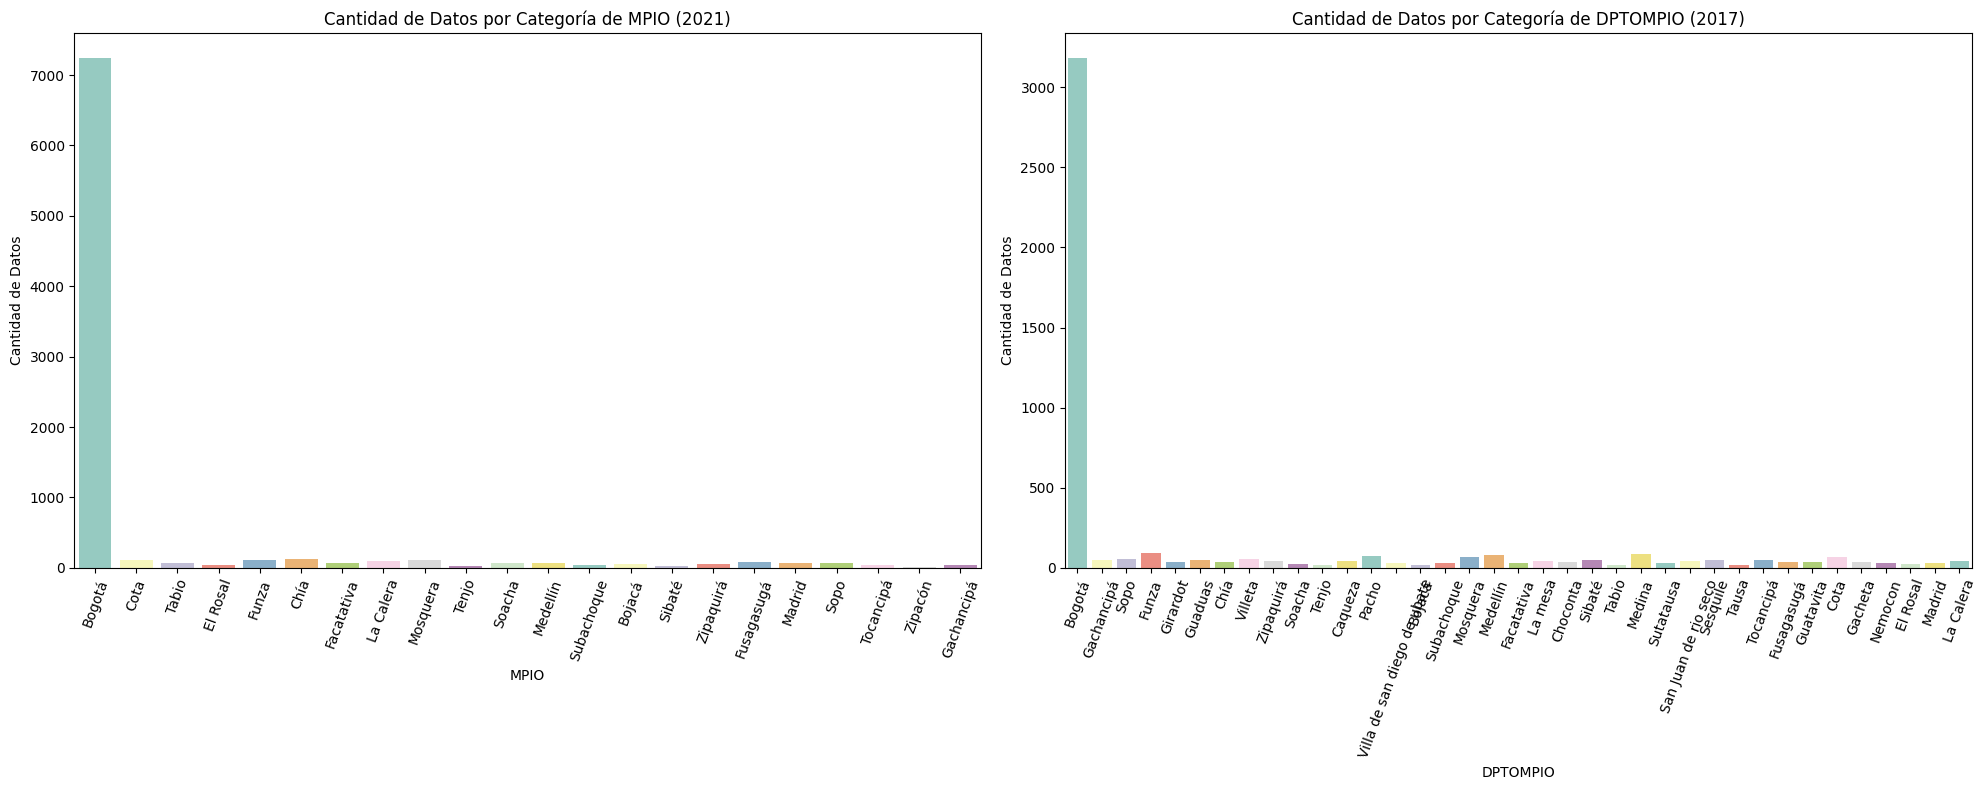

In [77]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="MPIO", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de MPIO (2021)')
plt.xlabel('MPIO')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="DPTOMPIO", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de DPTOMPIO (2017)')
plt.xlabel('DPTOMPIO')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

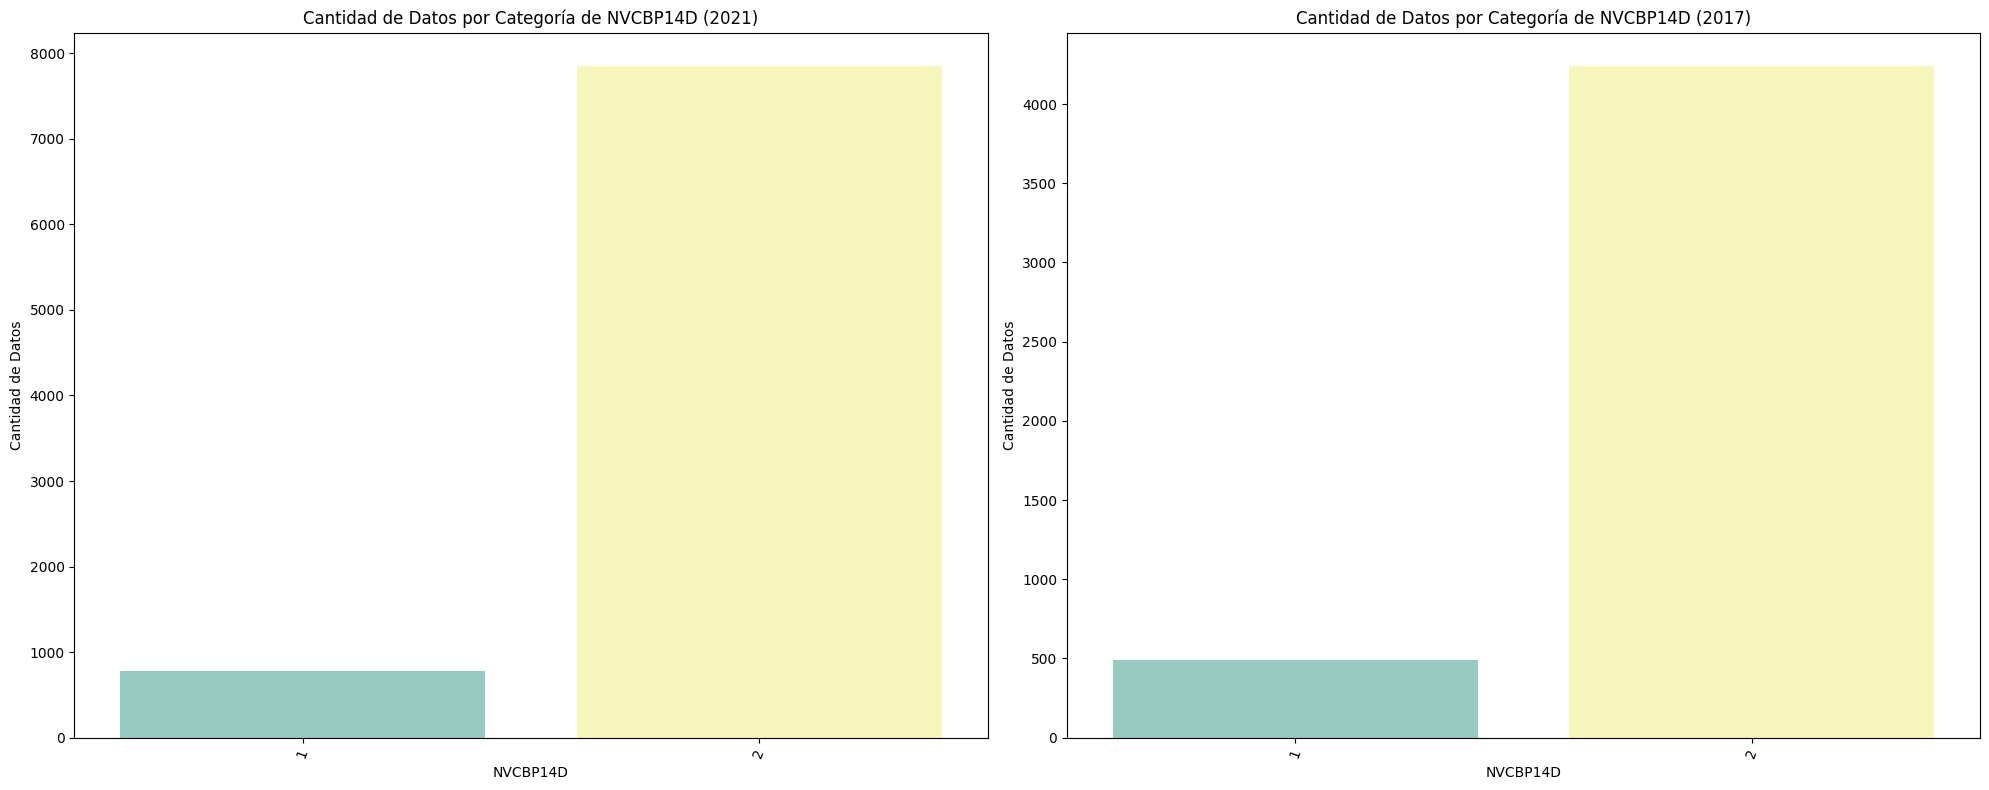

In [78]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NVCBP14D", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP14D (2021)')
plt.xlabel('NVCBP14D')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NVCBP14D", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP14D (2017)')
plt.xlabel('NVCBP14D')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

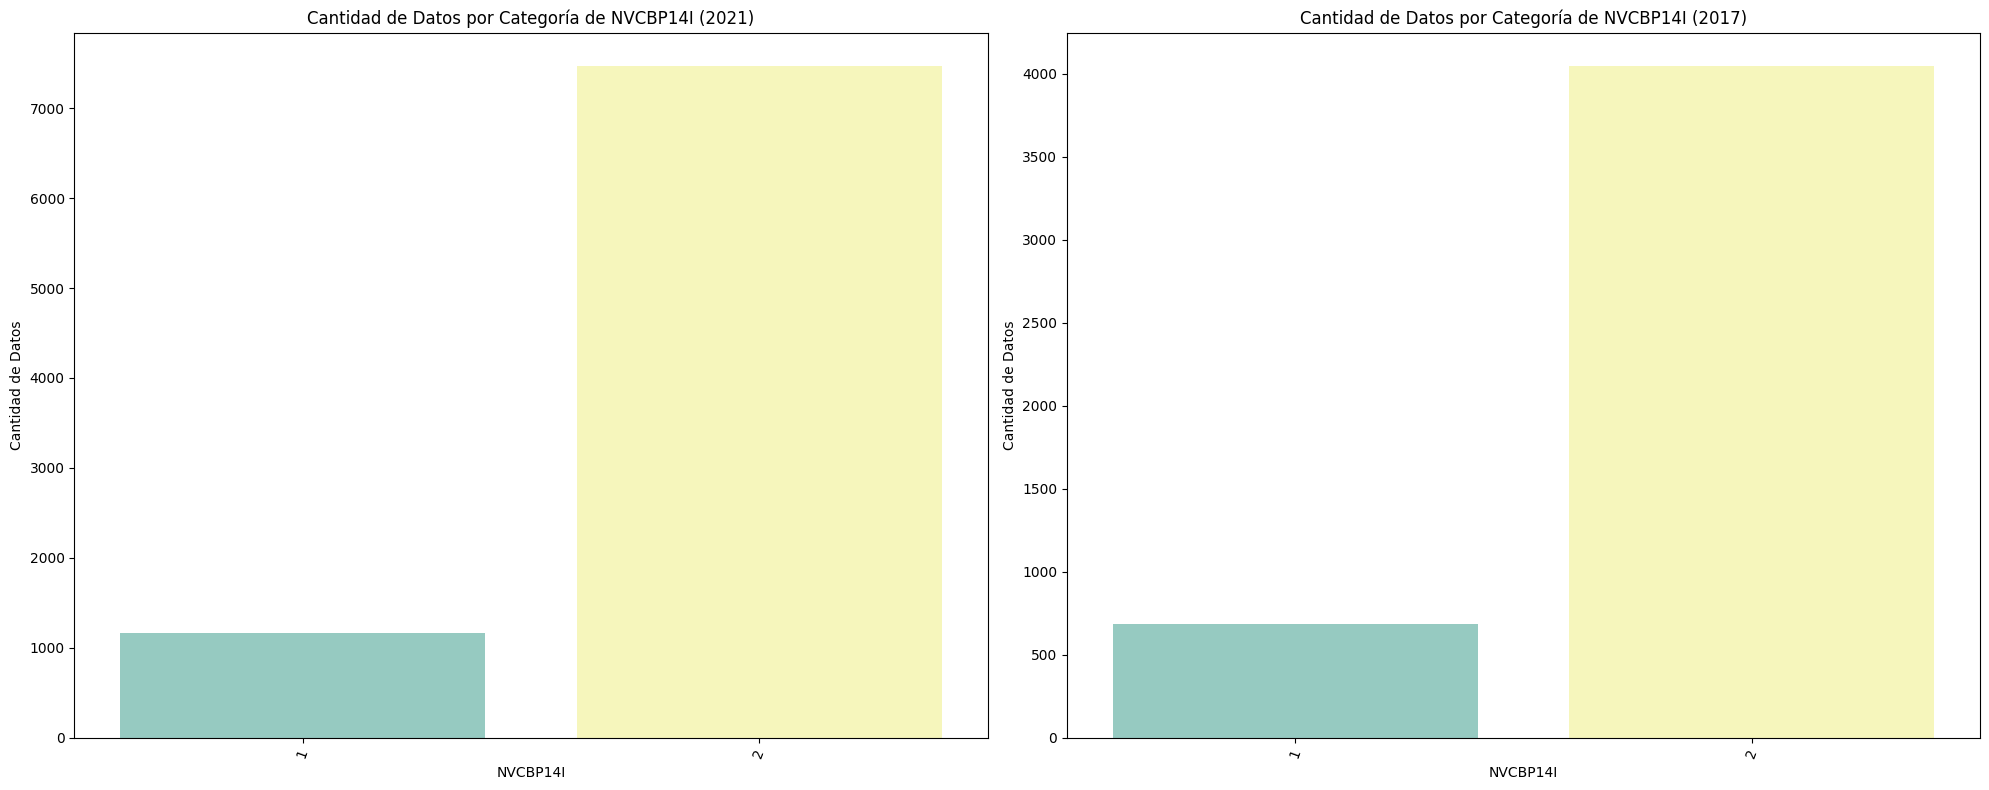

In [79]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NVCBP14I", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP14I (2021)')
plt.xlabel('NVCBP14I')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NVCBP14I", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP14I (2017)')
plt.xlabel('NVCBP14I')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

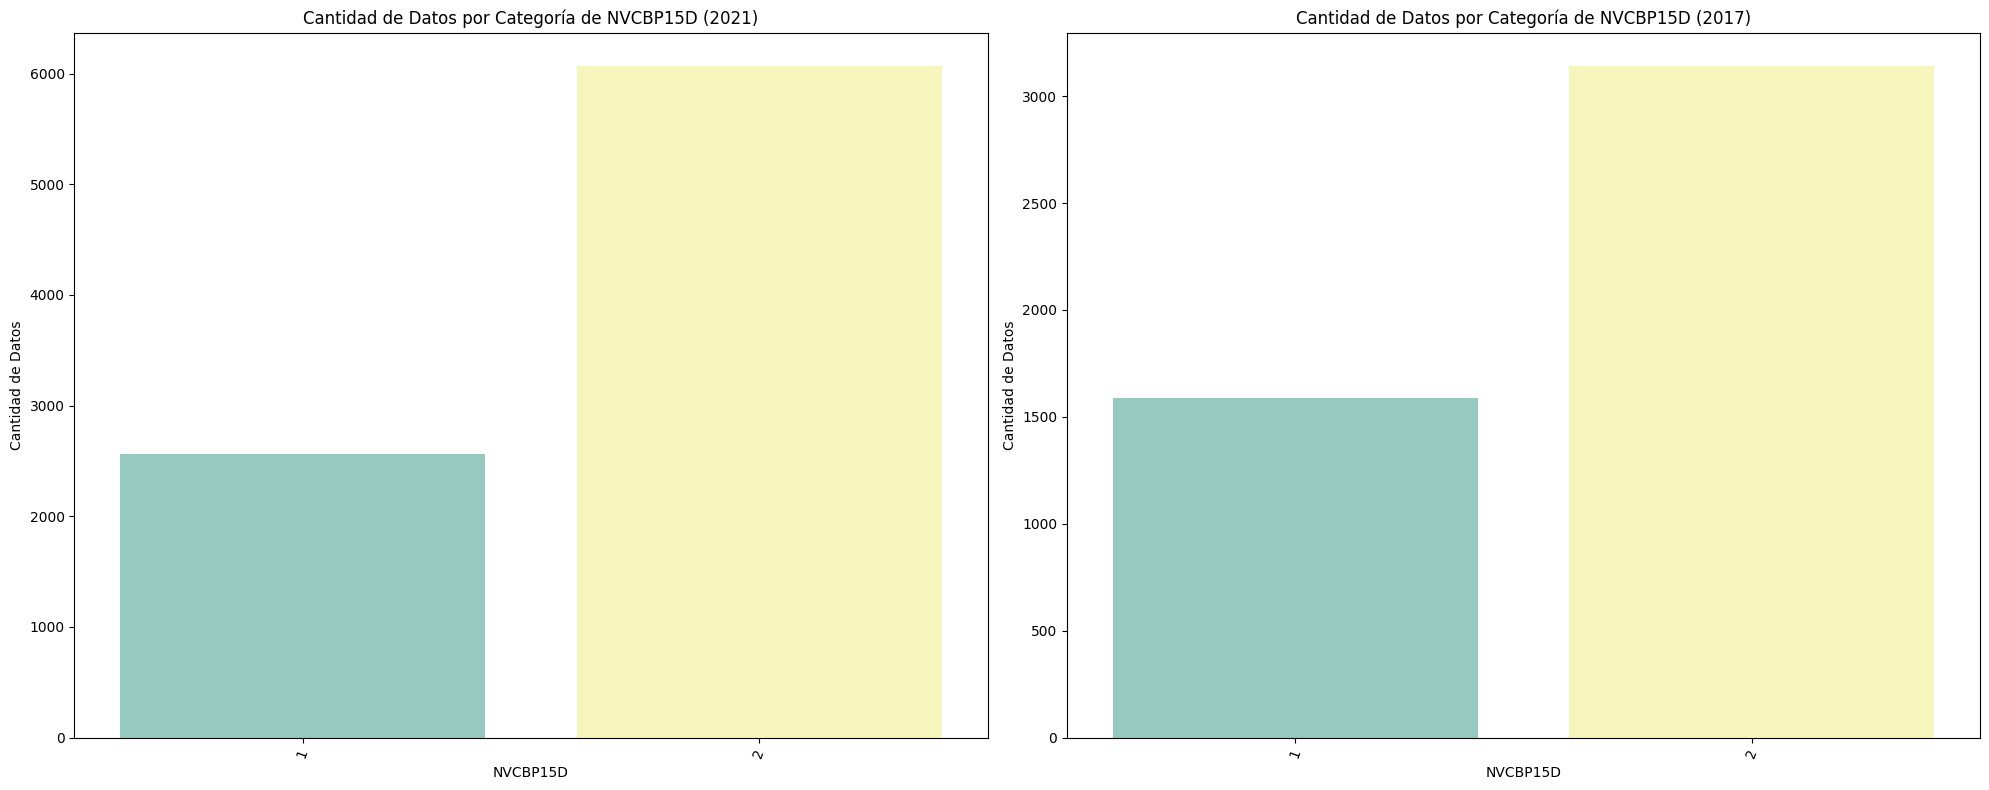

In [80]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NVCBP15D", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP15D (2021)')
plt.xlabel('NVCBP15D')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NVCBP15D", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP15D (2017)')
plt.xlabel('NVCBP15D')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

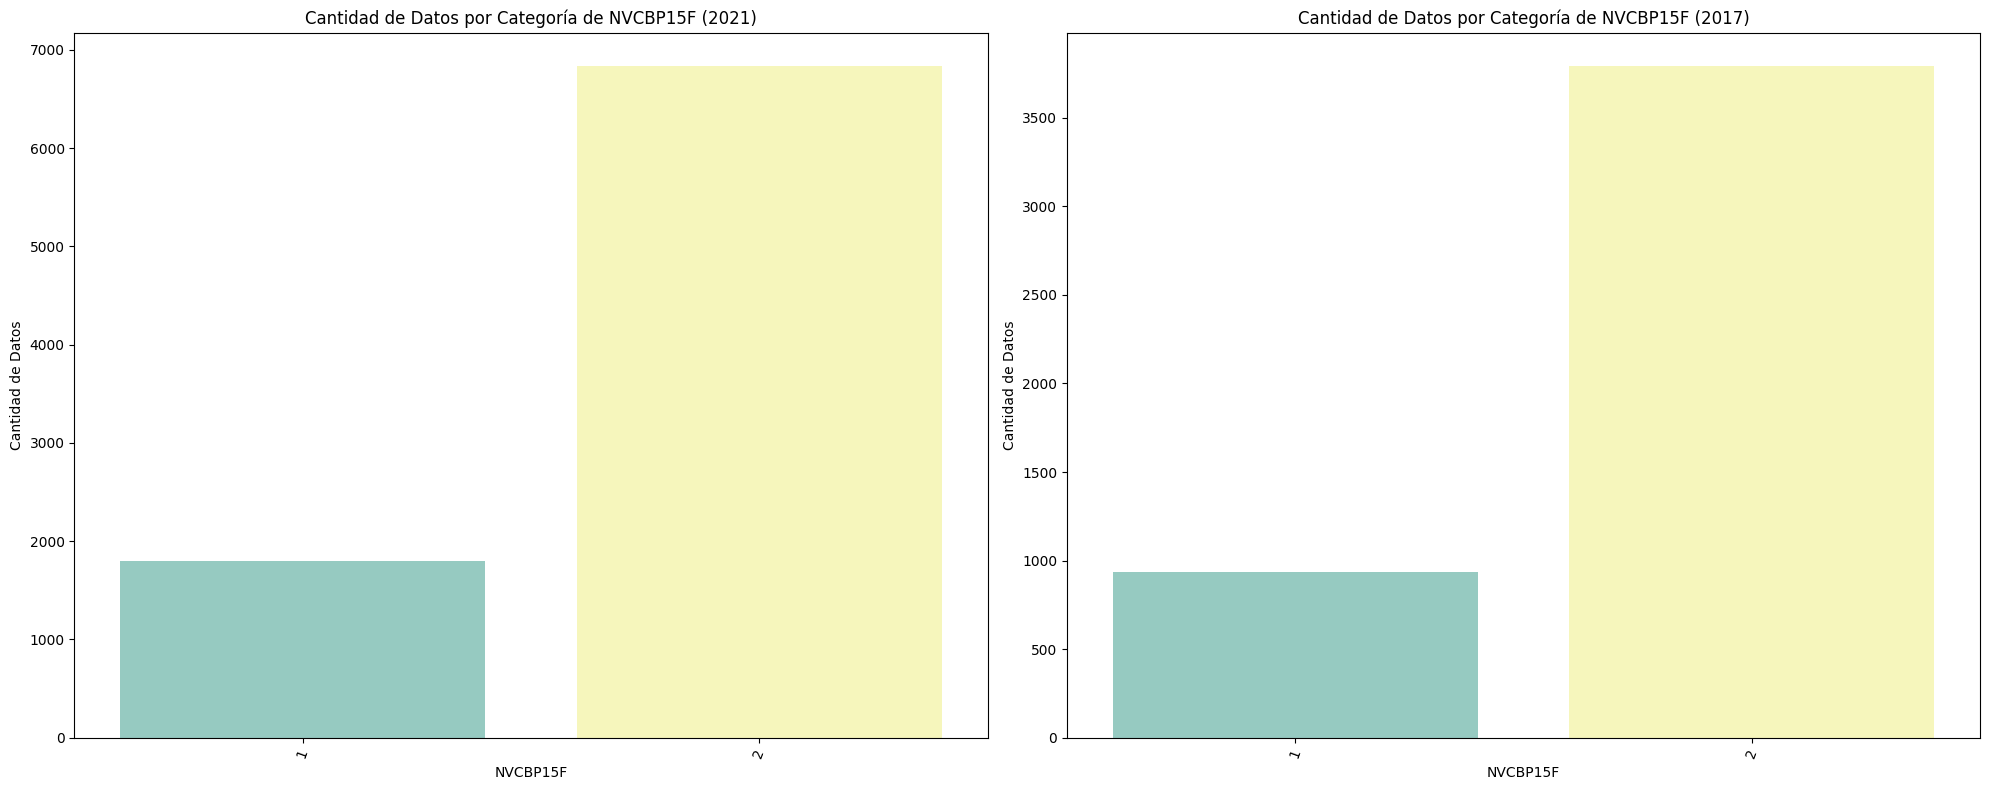

In [81]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NVCBP15F", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP15F (2021)')
plt.xlabel('NVCBP15F')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NVCBP15F", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP15F (2017)')
plt.xlabel('NVCBP15F')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

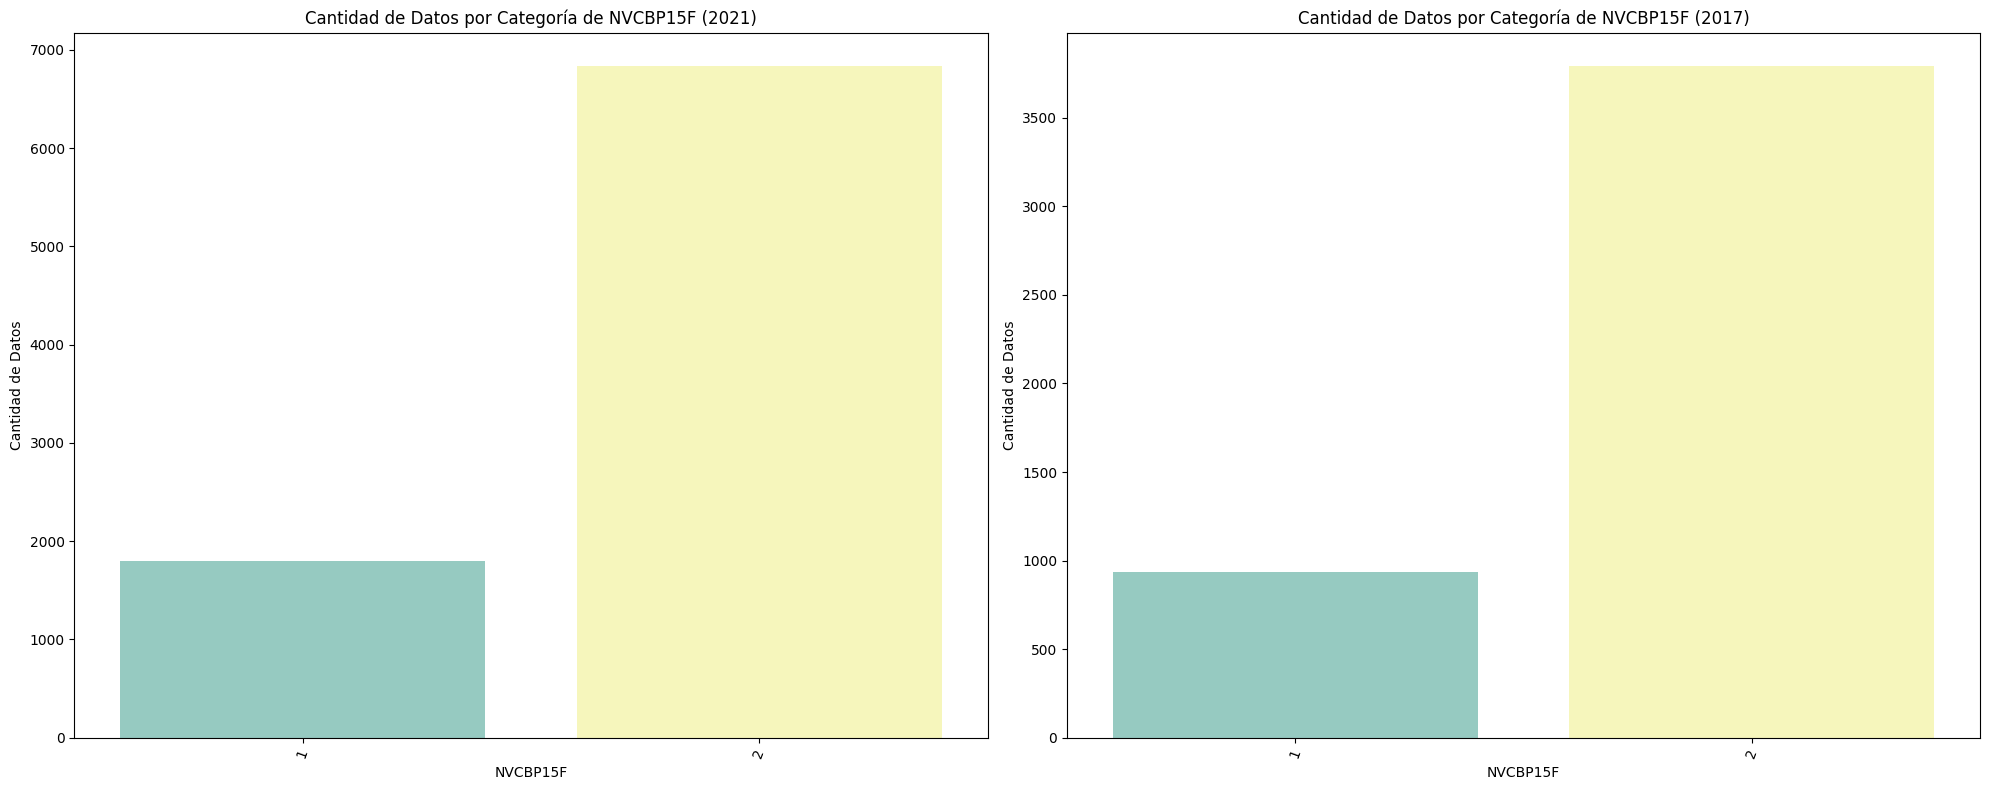

In [82]:
plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NVCBP15F", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP15F (2021)')
plt.xlabel('NVCBP15F')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NVCBP15F", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NVCBP15F (2017)')
plt.xlabel('NVCBP15F')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [83]:
#ASMA DE 2017 NPCFP14I

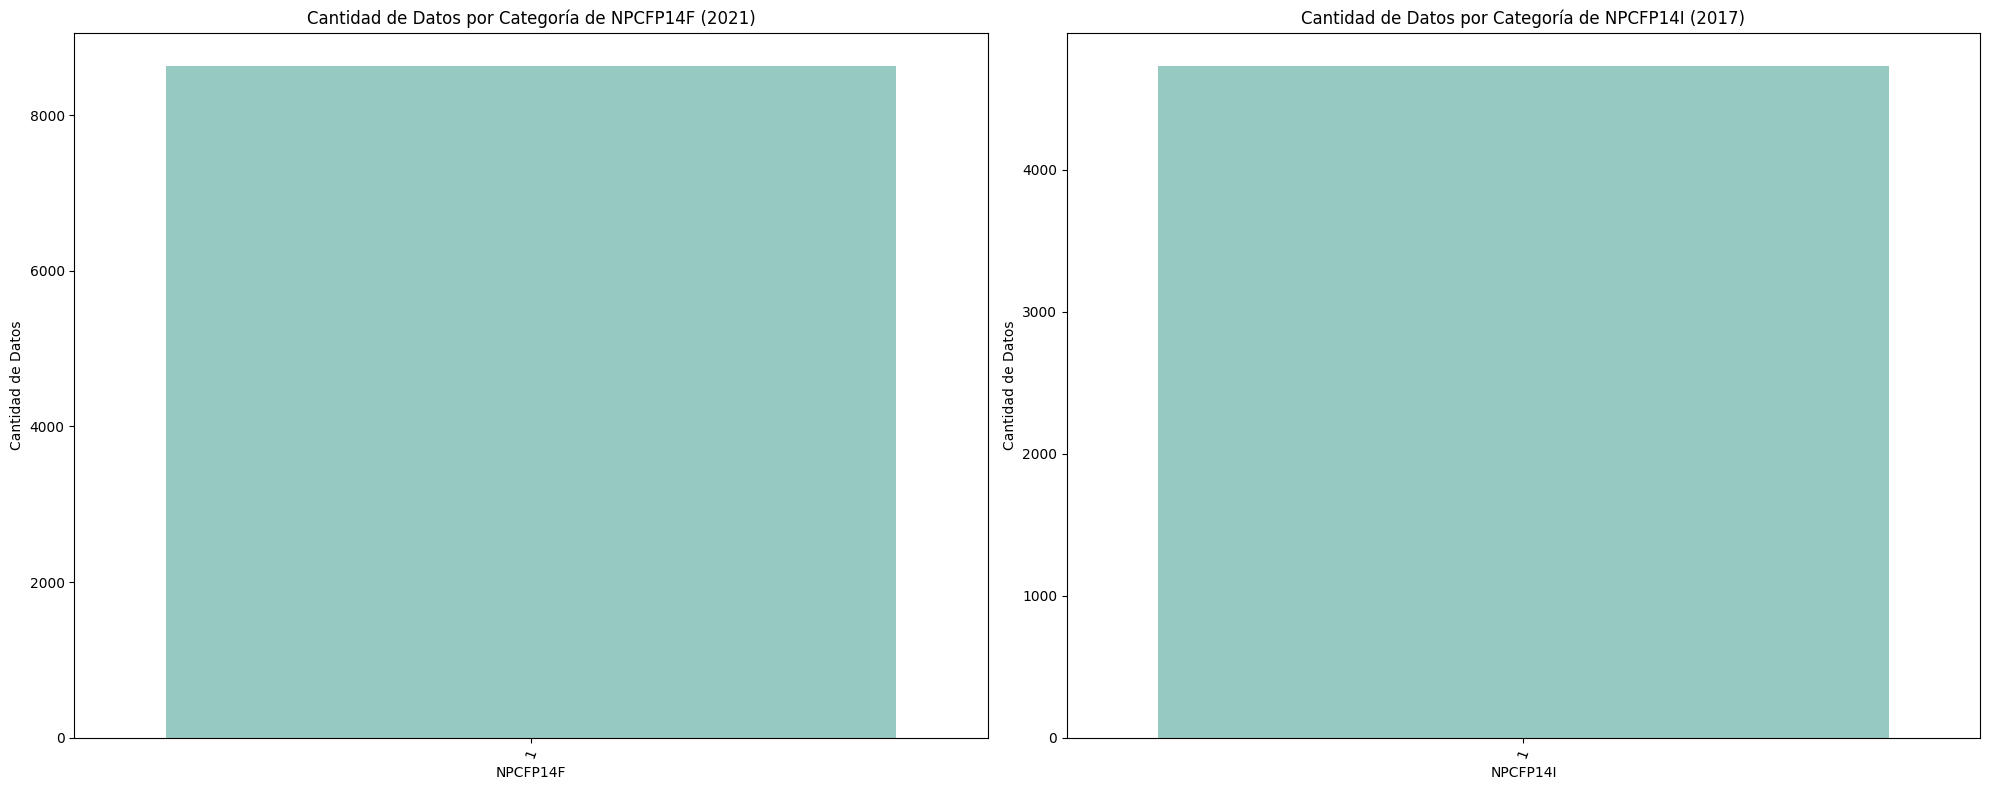

In [84]:

plt.figure(figsize=(20, 8))

# Subtrama 1 para dfVar2021
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="NPCFP14F", data=dfVar2021, palette="Set3")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NPCFP14F (2021)')
plt.xlabel('NPCFP14F')
plt.ylabel('Cantidad de Datos')

# Subtrama 2 para dfVar2017
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="NPCFP14I", data=dfVar2017, palette="Set3")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.title('Cantidad de Datos por Categoría de NPCFP14I (2017)')
plt.xlabel('NPCFP14I')
plt.ylabel('Cantidad de Datos')

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [85]:
dfVar2021["Fecha_anio"] = 2021

C:\Users\user\AppData\Local\Temp\ipykernel_4340\878850262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVar2021["Fecha_anio"] = 2021


In [86]:
dfVar2017["Fecha_anio"] = 2017

C:\Users\user\AppData\Local\Temp\ipykernel_4340\3665911371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVar2017["Fecha_anio"] = 2017


In [87]:
newDFVar2017 = dfVar2017.copy()

In [88]:
dfVar2021

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NVCBP8A,NVCBP8G,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14D,NVCBP14I,NVCBP15D,NVCBP15F,NPCFP14F,MPIO,NPCEP5,NPCEP4,NVCBP12,NVCBP13,Fecha_anio
0,1000001,10000011,100000111,2,2,1,4,2,2,2,2,2,2,1,Bogotá,2,70,1,4,2021
1,1000004,10000041,100000412,1,2,1,4,2,2,2,2,2,2,1,Bogotá,2,60,1,4,2021
2,1000033,10000331,100003313,2,2,1,4,1,2,2,1,1,2,1,Bogotá,1,13,1,4,2021
3,1000040,10000401,100004011,2,2,1,4,1,2,2,2,2,2,1,Bogotá,1,38,1,4,2021
4,1000041,10000411,100004111,1,2,1,4,1,2,2,2,1,2,1,Bogotá,2,56,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,999973,9999731,99997311,1,1,1,6,1,1,1,2,1,1,1,Bogotá,2,35,1,6,2021
8626,999974,9999741,99997413,1,2,1,4,2,1,2,2,1,1,1,Bogotá,1,9,1,4,2021
8627,999977,9999771,99997713,1,2,1,4,1,1,2,2,1,1,1,Bogotá,1,0,1,4,2021
8628,999983,9999831,99998313,1,2,1,4,2,2,2,2,2,2,1,Bogotá,1,37,1,4,2021


In [89]:
newDFVar2017.rename(columns={'DPTOMPIO': 'MPIO'}, inplace=True)
newDFVar2017.rename(columns={'NPCFP14I': 'NPCFP14F'}, inplace=True)

In [90]:
unionDF = pd.concat([newDFVar2017, dfVar2021], ignore_index=True)
unionDF

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NVCBP8A,NVCBP8G,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14D,NVCBP14I,NVCBP15D,NVCBP15F,NPCFP14F,MPIO,NPCEP5,NPCEP4,NVCBP12,NVCBP13,Fecha_anio
0,101033,1010331,10103311,2,2,1,4,2,2,2,2,2,2,1,Bogotá,1,39,1,4,2017
1,101041,1010411,10104112,2,2,1,4,1,1,1,2,1,1,1,Bogotá,2,22,1,4,2017
2,101042,1010421,10104213,2,2,1,2,2,2,2,2,2,2,1,Bogotá,2,29,1,2,2017
3,101047,1010471,10104713,1,2,1,4,2,2,2,2,2,2,1,Bogotá,1,11,1,4,2017
4,101059,1010591,10105914,2,2,1,4,2,2,2,2,2,2,1,Bogotá,2,37,1,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,999973,9999731,99997311,1,1,1,6,1,1,1,2,1,1,1,Bogotá,2,35,1,6,2021
13353,999974,9999741,99997413,1,2,1,4,2,1,2,2,1,1,1,Bogotá,1,9,1,4,2021
13354,999977,9999771,99997713,1,2,1,4,1,1,2,2,1,1,1,Bogotá,1,0,1,4,2021
13355,999983,9999831,99998313,1,2,1,4,2,2,2,2,2,2,1,Bogotá,1,37,1,4,2021


In [91]:
unionDF['humedad_actual'] = 'Y'
unionDF['ventilacion_actual'] = 'Y'
unionDF['materialPisos_actual'] = 'Y'
unionDF['contaminacionAire_actual'] = 'Y'
unionDF['contaminacionBasuras_actual'] = 'Y'


In [92]:
unionDF['Edad Actual'] = 'Y'

In [93]:
lista =[]
for i in newDFVar2017["DIRECTORIO"]:
    for j in dfVar2021["DIRECTORIO"]:
        if i == j:
            lista.append(i)
lista

[]

In [94]:

lista =[]
for i in newDFVar2017["DIRECTORIO_HOG"]:
    for j in dfVar2021["DIRECTORIO_HOG"]:
        if i == j:
            lista.append(i)
lista

[]

In [95]:

lista =[]
for i in newDFVar2017["DIRECTORIO_PER"]:
    for j in dfVar2021["DIRECTORIO_PER"]:
        if i == j:
            lista.append(i)
lista

[]

In [96]:
dfVar2021 = dfVar2021.drop(columns=["DIRECTORIO_PER","DIRECTORIO_HOG","DIRECTORIO"])

In [97]:
dfVar2017 = dfVar2017.drop(columns=["DIRECTORIO_PER","DIRECTORIO_HOG","DIRECTORIO"])

In [98]:
unionDF

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NVCBP8A,NVCBP8G,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14D,...,NPCEP4,NVCBP12,NVCBP13,Fecha_anio,humedad_actual,ventilacion_actual,materialPisos_actual,contaminacionAire_actual,contaminacionBasuras_actual,Edad Actual
0,101033,1010331,10103311,2,2,1,4,2,2,2,...,39,1,4,2017,Y,Y,Y,Y,Y,Y
1,101041,1010411,10104112,2,2,1,4,1,1,1,...,22,1,4,2017,Y,Y,Y,Y,Y,Y
2,101042,1010421,10104213,2,2,1,2,2,2,2,...,29,1,2,2017,Y,Y,Y,Y,Y,Y
3,101047,1010471,10104713,1,2,1,4,2,2,2,...,11,1,4,2017,Y,Y,Y,Y,Y,Y
4,101059,1010591,10105914,2,2,1,4,2,2,2,...,37,1,4,2017,Y,Y,Y,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,999973,9999731,99997311,1,1,1,6,1,1,1,...,35,1,6,2021,Y,Y,Y,Y,Y,Y
13353,999974,9999741,99997413,1,2,1,4,2,1,2,...,9,1,4,2021,Y,Y,Y,Y,Y,Y
13354,999977,9999771,99997713,1,2,1,4,1,1,2,...,0,1,4,2021,Y,Y,Y,Y,Y,Y
13355,999983,9999831,99998313,1,2,1,4,2,2,2,...,37,1,4,2021,Y,Y,Y,Y,Y,Y


In [99]:
unionDF.rename(columns={'NVCBP8A': 'humedad',
               'NVCBP8G': 'ventilacion',
               'NVCBP12': 'paredExterior',
               'NVCBP13': 'materialPisos',
               'NVCBP14A': 'cercaniaFabricaIndustria',
               'NVCBP14B': 'cercaniaBasurerors',
               'NVCBP14D': 'cercaniaTerminales',
               'NVCBP14I': 'cercaniaCanios',
               'NVCBP15D': 'contaminacionAire',
               'NVCBP15F': 'contaminacionBasuras',
               'NPCFP14F': 'asma',
               'MPIO': 'municipio',
               'NPCEP5': 'sexo',
               'NPCEP4': 'edad',
               },inplace=True)

In [100]:
columnasDimensionFecha = ["Fecha_anio","DIRECTORIO_HOG"]

columnasDimensionVivienda = ["DIRECTORIO","DIRECTORIO_HOG","DIRECTORIO_PER",'humedad', 'ventilacion', 'paredExterior', 
                             'materialPisos', 'cercaniaFabricaIndustria', 'cercaniaBasurerors',
                             'cercaniaTerminales', 'cercaniaCanios', 'contaminacionAire', 
                             'contaminacionBasuras','humedad_actual','ventilacion_actual',
                             'materialPisos_actual','contaminacionAire_actual','contaminacionBasuras_actual']

columnasDimensionSalud = ["DIRECTORIO_PER",'sexo', 'edad']

columnasDimensionUbicacion = ["DIRECTORIO_HOG",'municipio']


In [101]:
DimensionFecha = unionDF[columnasDimensionFecha].copy()

DimensionUbicacion =unionDF[columnasDimensionUbicacion].copy()

DimensionVivienda = unionDF[columnasDimensionVivienda].copy()

DimensionSalud = unionDF[columnasDimensionSalud].copy()


In [102]:
DimensionFecha.to_csv('DimensionFecha.csv', index=False)
DimensionUbicacion.to_csv('DimensionUbicacion.csv', index=False)
DimensionVivienda.to_csv('DimensionVivienda.csv', index=False)
DimensionSalud.to_csv('DimensionSalud.csv', index=False)